In [4]:
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy

points = np.array([[0.3, 3], [1, 0], [2.1, 0], [3, 3.7]])
shift2zero(points)

# # segments = [
# #     [[0.7, 1.8]], [[0.46666666666666656, 2.043243243243243]], [[0.23333333333333328, 2.2864864864864862]], [[0.0, 2.5297297297297296]], [[2.7, 2.7]]
# # ]
#
# segments = [
#     [[0.7, 1.8]], [[0.46666666666666656, 2.043243243243243]], [[0.23333333333333328, 2.2864864864864862]], [[0.0, 2.7]], [[2.7, 2.7]]
# ]
#
# segments_2 = [
#     [[0.7, 1.8]], [[0.46666666666666656, 2.043243243243243]], [[0.23333333333333328, 2.2864864864864862]], [[0.0, 2.7]], [[2.7, 2.7]]
# ]

h = 1

item_1 = Item(1, points)
item_1.set_segments(h)

# item_1.segments = segments

item_2 = Item(2, copy(points))
item_2.set_segments(h)

# item_2.segments = copy(segments_2)

item_3 = Item(3, copy(points))
item_3.set_segments(h)

# item_3.segments = copy(segments_2)

item_4 = Item(4, copy(points))
item_4.set_segments(h)

# item_4.segments = copy(segments_2)

item_5 = Item(5, copy(points))
item_5.set_segments(h)

# item_5.segments = copy(segments_2)

items = [copy(item_1), copy(item_2), copy(item_3), copy(item_4), copy(item_5)]

from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 1
points = np.array([[0.3, 3], [1, 0], [2.1, 0], [3, 3.7]])

lines = polygon2segments(points, h)
print(lines)

packaging = Packing(width=10, height=30, drill_radius=0)

pallets = Pallets([10, 30])
pallets.add_pallet_lines()

print(pallets.pallet_lines)


[[[0.7, 1.8]], [[0.46666666666666656, 2.043243243243243]], [[0.23333333333333328, 2.2864864864864862]], [[0.0, 2.7]], [[2.7, 2.7]]]
[[[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]]]


In [5]:
def pack_item(item, t_vector, r):
    print()
    item.t_vector = [t_vector, r]
    item.packed = True
    for s in range(len(item.segments)):
        for l in range(len(item.segments[s])):
            new_line = [copy(item.segments[s][l][0]) + copy(item.t_vector[0]), copy(item.segments[s][l][1]) + copy(item.t_vector[0])]
            pallets.pallet_lines[r+s].append(copy(new_line))
        pallets.pallet_lines[r+s].sort(key=lambda x: int(x[0]), reverse=False)
        print('строка', r+s , ':', pallets.pallet_lines[r+s])


for item in items:
    r = 0
    while r < len(pallets.pallet_lines) and item.packed == False:
        row = pallets.pallet_lines[r]
        k = 1
        ex_flag = 0
        while k < len(row) and item.packed == False and ex_flag == 0:
            t_vector = row[k-1][1] - item.segments[0][0][0]
            i = 0
            l = len(item.segments[0])
            while i < len(item.segments) and r + i < len(pallets.pallet_lines) and ex_flag == 0:
                    j = 0
                    while j < len(item.segments[i]) and ex_flag == 0:
                        m = 0
                        while m < len(pallets.pallet_lines[r+i]) and ex_flag == 0:
                            # случаи пересечения линии и упаковки
                            if pallets.pallet_lines[r+i][m][0] <= item.segments[i][j][0] + t_vector < pallets.pallet_lines[r+i][m][1]:
                                t_vector += pallets.pallet_lines[r+i][m][1] - (item.segments[i][j][0] + t_vector)
                                i = 0
                            elif pallets.pallet_lines[r+i][m][0] <= item.segments[i][j][1] + t_vector < pallets.pallet_lines[r+i][m][1]:
                                t_vector += pallets.pallet_lines[r+i][m][1] - (item.segments[i][j][0] + t_vector)
                                i = 0
                            # объект выходит за границы палеты
                            elif item.segments[i][j][0] + t_vector < 0:
                                t_vector = - item.segments[i][j][0]
                                i = 0
                            # наверное надо сделать это первым условием, будет чаще всего встречаться
                            elif item.segments[i][j][1] + t_vector > pallets.shape[0]:
                                ex_flag = 1
                            m += 1
                        j += 1
                    i+=1
            # если объект влезает, добавляем его на палету
            if ex_flag == 0:
                pack_item(item, t_vector, r)
                ex_flag = 1
            k+=1
        r+=1




строка 0 : [[0, 0], [0.7, 1.8], [10, 10]]
строка 1 : [[0, 0], [0.46666666666666656, 2.043243243243243], [10, 10]]
строка 2 : [[0, 0], [0.23333333333333328, 2.2864864864864862], [10, 10]]
строка 3 : [[0, 0], [0.0, 2.7], [10, 10]]
строка 4 : [[0, 0], [2.7, 2.7], [10, 10]]

строка 0 : [[0, 0], [0.7, 1.8], [3.4000000000000004, 4.5], [10, 10]]
строка 1 : [[0, 0], [0.46666666666666656, 2.043243243243243], [3.166666666666667, 4.743243243243243], [10, 10]]
строка 2 : [[0, 0], [0.23333333333333328, 2.2864864864864862], [2.9333333333333336, 4.986486486486486], [10, 10]]
строка 3 : [[0, 0], [0.0, 2.7], [2.7, 5.4], [10, 10]]
строка 4 : [[0, 0], [2.7, 2.7], [5.4, 5.4], [10, 10]]

строка 0 : [[0, 0], [0.7, 1.8], [3.4000000000000004, 4.5], [6.1000000000000005, 7.2], [10, 10]]
строка 1 : [[0, 0], [0.46666666666666656, 2.043243243243243], [3.166666666666667, 4.743243243243243], [5.866666666666667, 7.443243243243243], [10, 10]]
строка 2 : [[0, 0], [0.23333333333333328, 2.2864864864864862], [2.933333333

[-0.0, 0]
точки:  [0. 3.]
точки стали:  [0. 3.]
точки:  [0.7 0. ]
точки стали:  [0.7 0. ]
точки:  [1.8 0. ]
точки стали:  [1.8 0. ]
точки:  [2.7 3.7]
точки стали:  [2.7 3.7]
[2.7, 0]
точки:  [0. 3.]
точки стали:  [2.7 3. ]
точки:  [0.7 0. ]
точки стали:  [3.4 0. ]
точки:  [1.8 0. ]
точки стали:  [4.5 0. ]
точки:  [2.7 3.7]
точки стали:  [5.4 3.7]
[5.4, 0]
точки:  [0. 3.]
точки стали:  [5.4 3. ]
точки:  [0.7 0. ]
точки стали:  [6.1 0. ]
точки:  [1.8 0. ]
точки стали:  [7.2 0. ]
точки:  [2.7 3.7]
точки стали:  [8.1 3.7]
[-0.0, 4]
точки:  [0. 3.]
точки стали:  [0. 7.]
точки:  [0.7 0. ]
точки стали:  [0.7 4. ]
точки:  [1.8 0. ]
точки стали:  [1.8 4. ]
точки:  [2.7 3.7]
точки стали:  [2.7 7.7]
[2.7, 4]
точки:  [0. 3.]
точки стали:  [2.7 7. ]
точки:  [0.7 0. ]
точки стали:  [3.4 4. ]
точки:  [1.8 0. ]
точки стали:  [4.5 4. ]
точки:  [2.7 3.7]
точки стали:  [5.4 7.7]


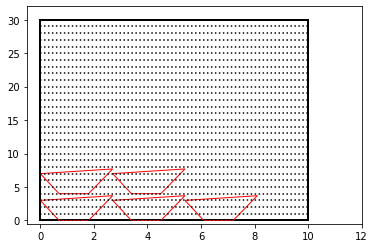

In [6]:
from matplotlib import pyplot as plt, patches

pallet_width = 10
pallet_height = 30

fig, ax = plt.subplots()

pallet = patches.Rectangle((0, 0),
                            pallet_width,
                            pallet_height,
                            linewidth=2,
                            facecolor='none',
                            edgecolor='black')
ax.add_patch(pallet)
ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

for i in range(int(pallet_height/h)):
    plt.plot([0, pallet_width], [i*h, i*h], linestyle = 'dotted', color = 'black')


for polygon in items:
    print(polygon.t_vector)
    for point in polygon.points:
        print('точки: ', point)
        point[0] += polygon.t_vector[0]
        point[1] += polygon.t_vector[1]
        print('точки стали: ', point)
    figure = patches.Polygon(polygon.points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
    ax.add_patch(figure)


plt.savefig('line-packing.png')
# plt.show()